In [9]:
%pip install gym

Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install gym[toy_text]

  Using cached pygame-2.1.0.tar.gz (5.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [81 lines of output]
  
  
  WARNING, No "Setup" File Exists, Running "buildconfig/config.py"
  Using WINDOWS configuration...
  
  Traceback (most recent call last):
    File "C:\Users\Asus\AppData\Local\Temp\pip-install-46hs2s4h\pygame_6b8651779a7446d8848afdebd603230f\buildconfig\config_win.py", line 336, in configure
      from . import vstools
    File "C:\Users\Asus\AppData\Local\Temp\pip-install-46hs2s4h\pygame_6b8651779a7446d8848afdebd603230f\buildconfig\vstools.py", line 5, in <module>
      from distutils.msvccompiler import MSVCCompiler, get_build_architecture
  ModuleNotFoundError: No module named 'distutils.msvccompiler'
  
  During handling of the above exception, another exception occurred:
  
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Asus\AppData\Lo

In [10]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


### ON-POLICY , SARSA algorithm

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [3]:
env = gym.make('FrozenLake-v1',render_mode="human")
env.reset()

(0, {'prob': 1})

In [4]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Hyperparameters
alpha = 0.1
gamma = 0.99
epsilon = 0.1
num_episodes = 1000

In [6]:
rewards_sarsa = []
steps_per_episode = []

for i in range(num_episodes):
    state = env.reset()[0]
    done = False 
    total_reward = 0
    step_count = 0 
    
        env.render()
    
    while not done:
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
        
        new_state , reward, done, _ , _ = env.step(action)
        new_state = new_state # Extract just observation from tuple
        new_action = np.argmax(Q[new_state, :]) # We chose new action based in current policy
        Q[state,action] += alpha * (reward  + gamma * Q[new_state, new_action] - Q[state, action])
        state = new_state
        total_reward += reward
        step_count += 1
        
        env.render()
        
    rewards_sarsa.append(total_reward)
    steps_per_episode.append(step_count)

KeyboardInterrupt: 

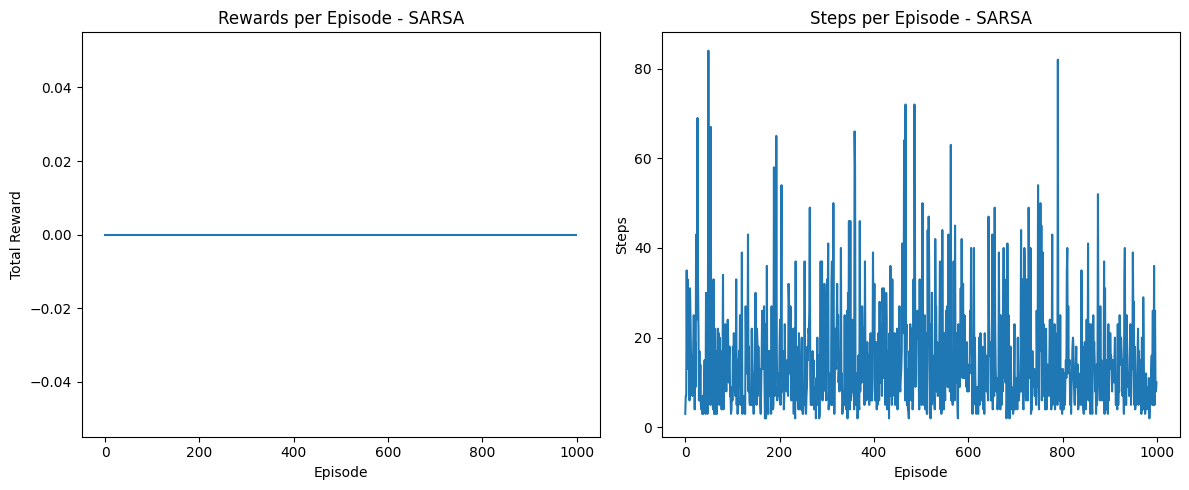

Training complete with SARSA


In [11]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(rewards_sarsa)
plt.title("Rewards per Episode - SARSA")
plt.xlabel("Episode")
plt.ylabel("Total Reward")

plt.subplot(1, 2, 2)
plt.plot(steps_per_episode)
plt.title("Steps per Episode - SARSA")
plt.xlabel("Episode")
plt.ylabel("Steps")

plt.tight_layout()
plt.show()

print("Training complete with SARSA")